In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

In [4]:
df = pd.read_excel("titanic3.xls")

In [5]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
df.shape

(1309, 14)

<AxesSubplot:ylabel='None'>

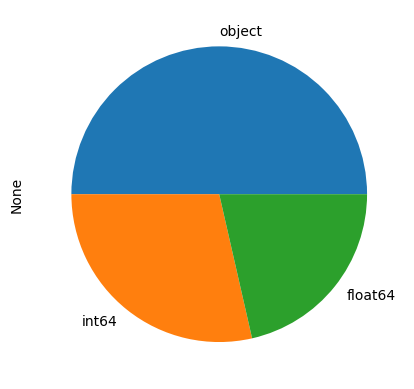

In [7]:
df.dtypes.value_counts().plot.pie()

In [8]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [18]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000764
embarked     0.001528
age          0.200917
home.dest    0.430863
boat         0.628724
cabin        0.774637
body         0.907563
dtype: float64

<AxesSubplot:>

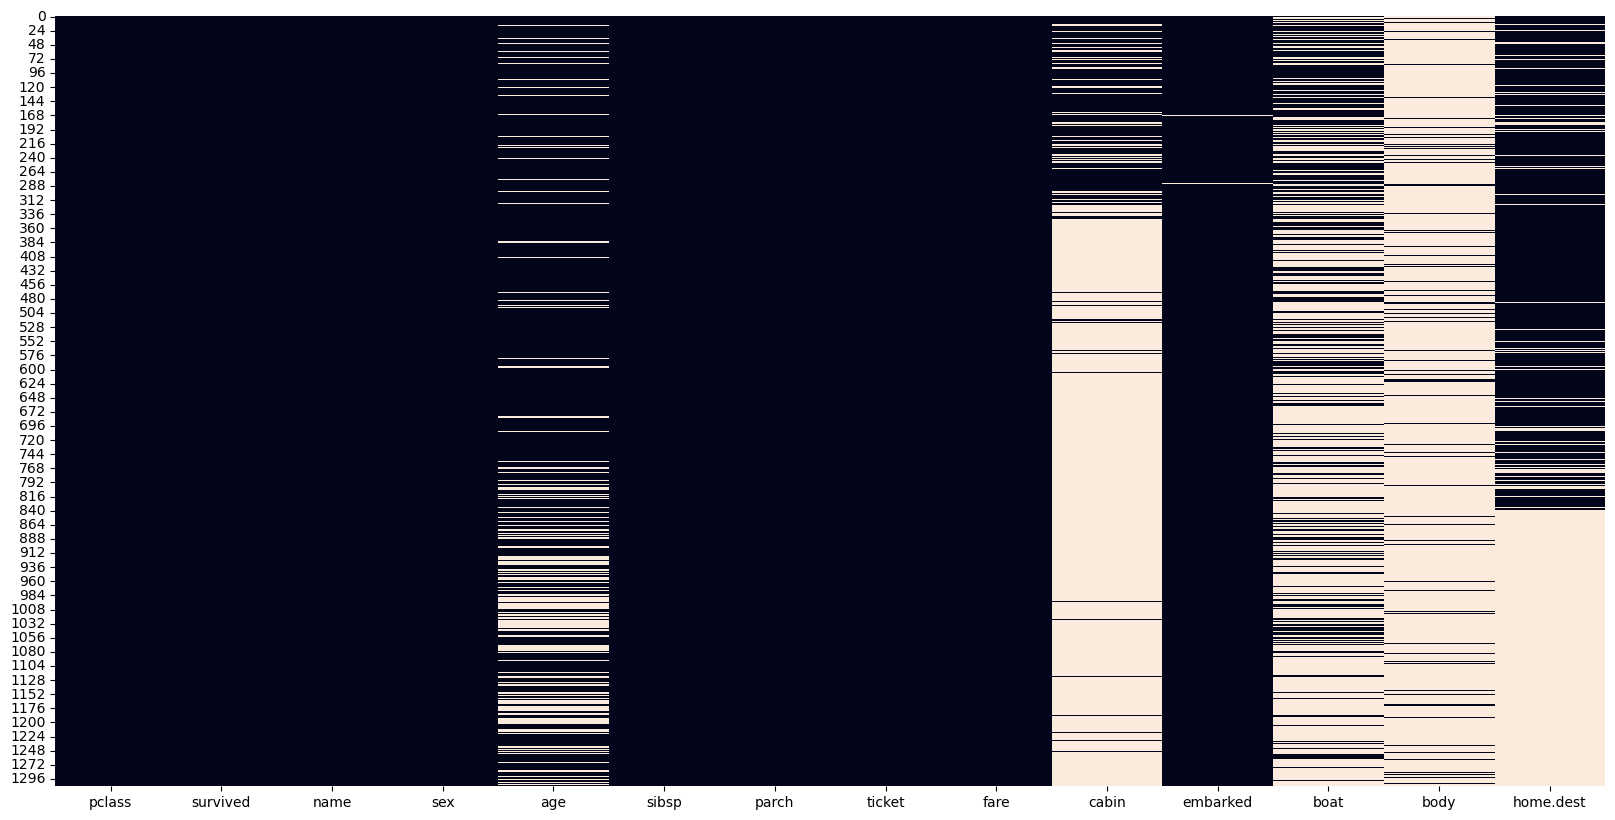

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [10]:
df.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [11]:
df["age"] == 10

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Name: age, Length: 1309, dtype: bool

In [15]:
df.dtypes.value_counts()

object     7
int64      4
float64    3
dtype: int64

In [12]:
list_object = []
for col in df.select_dtypes("object"):
    list_object.append(col)
list_object

['name', 'sex', 'ticket', 'cabin', 'embarked', 'boat', 'home.dest']

In [14]:
list_int = []
for col in df.select_dtypes("int64"):
    list_int.append(col)
list_int

['pclass', 'survived', 'sibsp', 'parch']

In [17]:
list_float = []
for col in df.select_dtypes("float64"):
    list_float.append(col)
list_float

['age', 'fare', 'body']

<AxesSubplot:>

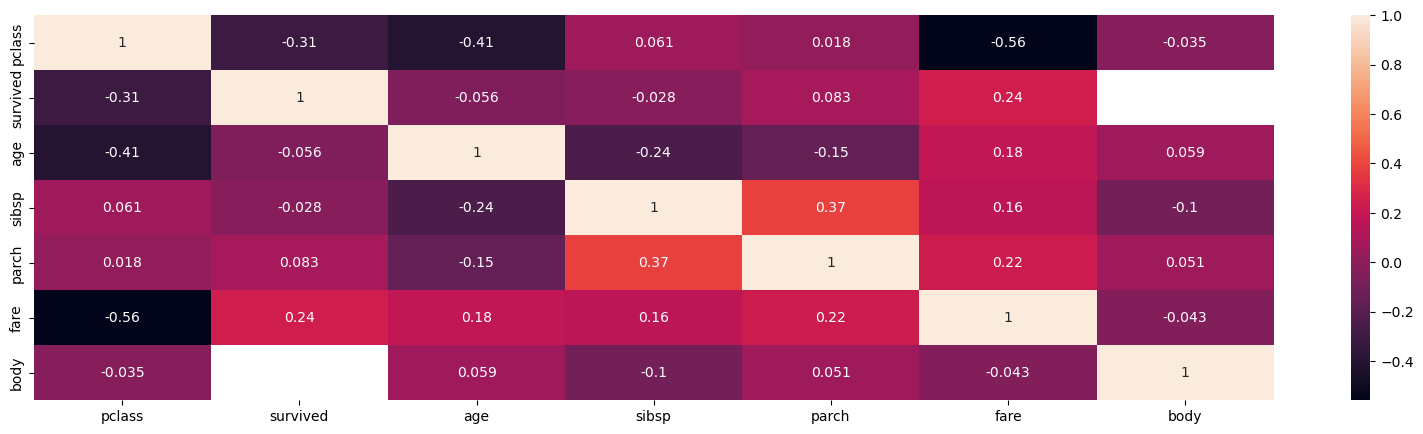

In [21]:
plt.figure(figsize=(20 , 5))
sns.heatmap(df.corr() , annot= True)

In [23]:
# sns.clustermap(df.corr())

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.ensemble import IsolationForest

In [26]:
for col in df.columns:
    if df[col].dtype == "object":
        le = LabelEncoder()
        df[col].fillna("None", inplace = True)
        le.fit(list(df[col].astype(str).values))
        df[col] = le.transform(list(df[col].astype(str).values))
    else:
        df[col].fillna(-999 , inplace = True)
# when we use Isolation forest we don"t need to encode our data with OneHot encoder therefore we use LabelEncoder enenthoug
# Isolation Forest can use anytype of data

In [27]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,21,0,29.0000,0,0,187,211.3375,43,3,11,-999.0,309
1,1,1,23,1,0.9167,1,2,49,151.5500,79,3,2,-999.0,230
2,1,0,24,0,2.0000,1,2,49,151.5500,79,3,27,-999.0,230
3,1,0,25,1,30.0000,1,2,49,151.5500,79,3,27,135.0,230
4,1,0,26,0,25.0000,1,2,49,151.5500,79,3,27,-999.0,230


In [28]:
model_Isolation = IsolationForest(contamination=0.001)
model_Isolation.fit(df)

C:\Users\boris\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.001)

In [29]:
outliers = model_Isolation.predict(df) == -1 

In [30]:
print(outliers)

[False False False ... False False False]


In [31]:
df["iforwst"] = pd.Series(model_Isolation.predict(df))
df["iforwst"] = df["iforwst"].map({1:0 , -1 : 1})
print(df["iforwst"].value_counts())

0    1307
1       2
Name: iforwst, dtype: int64


In [32]:
2/1307 # we find the rate of contamiantion that we set above

0.001530221882172915

In [33]:
df[df["iforwst"] == 1] # for example this two are anomalie

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,iforwst
49,1,1,198,1,36.0,0,1,831,512.3292,45,0,12,-999.0,15,1
116,1,1,406,0,60.0,1,4,123,263.0000,80,3,1,-999.0,362,1


In [34]:
df[df["iforwst"] == 0].head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,iforwst
0,1,1,21,0,29.0000,0,0,187,211.3375,43,3,11,-999.0,309,0
1,1,1,23,1,0.9167,1,2,49,151.5500,79,3,2,-999.0,230,0
2,1,0,24,0,2.0000,1,2,49,151.5500,79,3,27,-999.0,230,0
3,1,0,25,1,30.0000,1,2,49,151.5500,79,3,27,135.0,230,0
4,1,0,26,0,25.0000,1,2,49,151.5500,79,3,27,-999.0,230,0


In [35]:
df["embarked"].value_counts()

3    914
0    270
2    123
1      2
Name: embarked, dtype: int64

In [36]:
numerical_features = make_column_selector(dtype_include = np.number)
categorical_features = make_column_selector(dtype_exclude = np.number)

In [37]:


categorical_pipeline = make_pipeline(SimpleImputer( missing_values=None , strategy='most_frequent'),
                                     SimpleImputer(missing_values=np.nan , 
                                                            strategy='most_frequent'),OneHotEncoder()) 



In [38]:


make_column_transformer((categorical_pipeline, categorical_features))



ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer-1',
                                                  SimpleImputer(missing_values=None,
                                                                strategy='most_frequent')),
                                                 ('simpleimputer-2',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000201F178B4C0>)])

In [39]:


numerical_pipeline = make_pipeline( SimpleImputer(strategy='mean'), StandardScaler())



In [40]:


preprocessor = make_column_transformer((numerical_pipeline, numerical_features) , 
                                       (categorical_pipeline, categorical_features))



In [41]:


X_scaled = preprocessor.fit_transform(df)
X_scaled



array([[-1.54609786,  1.27200629, -1.67483171, ..., -0.31791226,
         1.13535489, -0.03911805],
       [-1.54609786,  1.27200629, -1.669529  , ..., -0.31791226,
         0.16134452, -0.03911805],
       [-1.54609786, -0.78615963, -1.66687765, ..., -0.31791226,
         0.16134452, -0.03911805],
       ...,
       [ 0.84191642, -0.78615963,  1.69769129, ...,  3.54592784,
         0.33395395, -0.03911805],
       [ 0.84191642, -0.78615963,  1.70034265, ..., -0.31791226,
         0.33395395, -0.03911805],
       [ 0.84191642, -0.78615963,  1.702994  , ..., -0.31791226,
         0.33395395, -0.03911805]])

In [42]:


df["age"].value_counts().sum() # the number of different value of age



1309

In [43]:


df["survived"].value_counts().sum()



1309

In [44]:


df["survived"].value_counts()



0    809
1    500
Name: survived, dtype: int64

In [45]:


df["sex"].value_counts()



1    843
0    466
Name: sex, dtype: int64